# Project Details

This project aims to classify tweet sentiments during the pandemic into five categories:

*   Extremely Negative: Severe dissatisfaction, fear, or frustration related to health crises, policies, or economic struggles
*   Negative: Moderate concerns or criticism.
*   Neutral: Objective or informational content.
*   Positive: Expressions of approval or satisfaction.
*   Extremely Positive: Strong optimism or joy.








Datasets Used in the Project:

Train & Test Datasets
Source:
[Kaggle: COVID-19 NLP Text Classification Dataset](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/data)

1. Training Dataset (Corona_NLP_train.csv): Contains over 41,000 labeled tweets categorized into predefined sentiment classes.
Purpose: To train machine learning models to identify and analyze sentiment patterns effectively.

2. Testing Dataset (Corona_NLP_test.csv): Includes more than 3,900 labeled tweets with predefined sentiment classes.
Purpose: To evaluate the accuracy and performance of the trained models on unseen data.

Evaluation Dataset (COVID-19_tweets.csv) Source:
[Kaggle: COVID-19 Tweets Dataset](https://www.kaggle.com/datasets/gpreda/covid19-tweets)

Dataset containing over 179,000 tweets.
Purpose: This dataset is utilized to evaluate the generalizability and robustness of the trained models when applied to unseen, real-world data. It serves as a benchmark for testing model performance on new scenarios.



# 1.Data Exploration and Preprocessing

## 1.1 import libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.2 Read Train and test files

In [ ]:
train = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
test = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

# reading tweet file (evaluation) too for shape finding
tweet = pd.read_csv('covid19_tweets.csv', encoding='latin-1', low_memory=False)

In [ ]:
train.shape

(41157, 6)

In [ ]:
test.shape

(3798, 6)

In [ ]:
tweet.shape

(179108, 13)

In [ ]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
tweet.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## 1.3 Train Dataset exploration

The datasets contain 7 columns housing the data info. The tweets contains mentions and hashtags which must be cleaned in order to help the models better understand the statistical relationship between the relevant details. The sentiment column contains 5 different classes. The other columns are the timeframe of the tweets and the location from where the tweets where twitted.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB



Data preprocessing steps needs to be done before feeding them into the models.

In [ ]:
train.isnull().sum()


,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


 The Location column contains 8,590 missing rows. Filling these blanks with the most common location would not be meaningful due to the significant number of missing values.

In [ ]:
train['Location'].value_counts()[:60]

,count
Location,
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
United Kingdom,337
"Los Angeles, CA",281
India,268
UK,232


The location info is splitted and merged because lots of the locations are in the same geolocation.
The datasets also shows a great reprentative bias. For a global distortion, the bulk of the data collected are within few geopolitical zones with Africa having a little representation. Different ideals, govermental polices, religious beliefs etc are factors that likely influenced the sentiment class of individual tweets.

In [ ]:
#splitting location into word pairs
train['Location'] = train['Location'].str.split(",").str[0]
test['Location'] = test['Location'].str.split(",").str[0]

In [ ]:
train['Location'].value_counts()[:60]


,count
Location,
London,1247
New York,709
United States,530
Washington,504
Los Angeles,402
Toronto,346
United Kingdom,342
India,276
Chicago,262


### 1.3.1 Train dataset sentiment count and categories

In [ ]:
train['Sentiment'].value_counts()

,count
Sentiment,
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


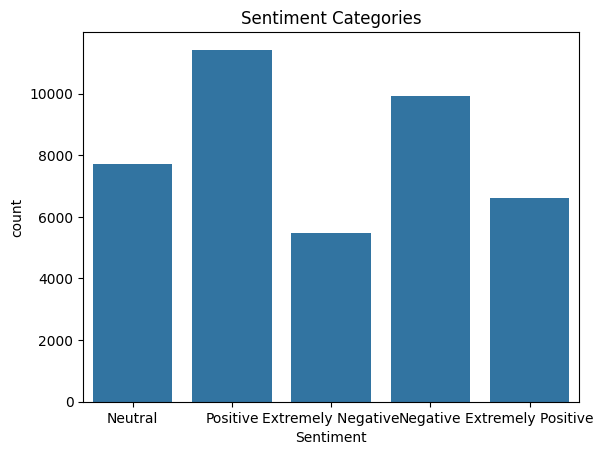

In [ ]:
# Visualizing Sentiment Category Distribution

sns.countplot(x='Sentiment', data=train).set_title("Sentiment Categories")
plt.show()

### 1.3.2 Most twitted locations

Text(0.5, 1.0, 'Most Twitted locations')

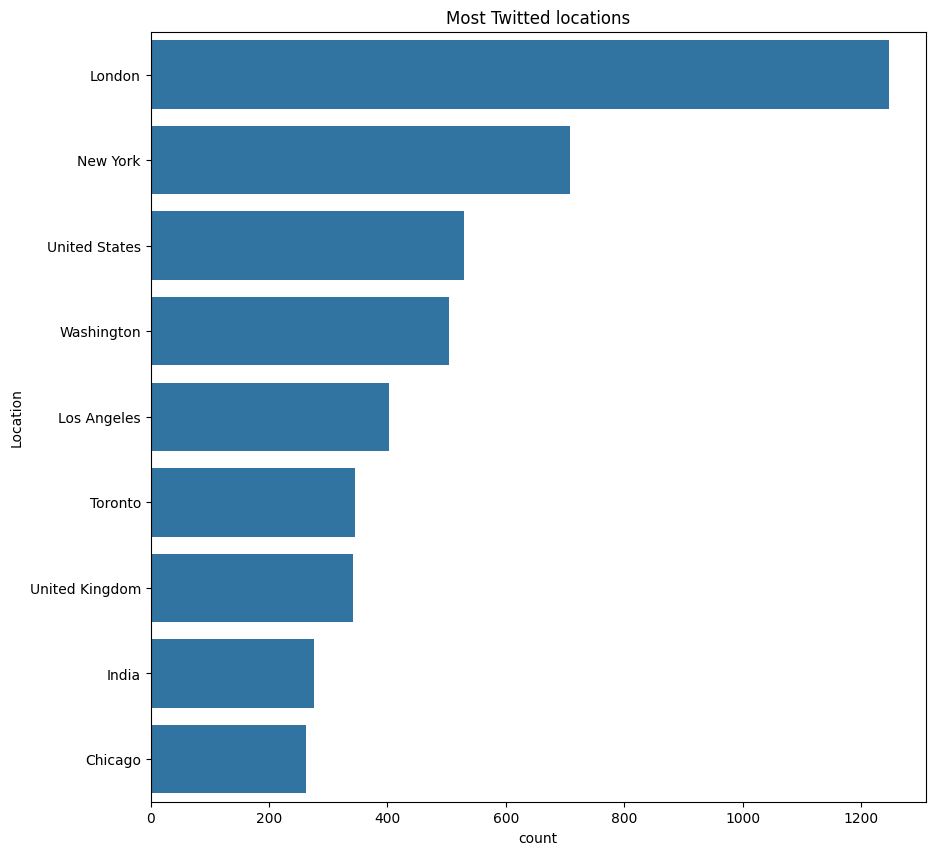

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[
    0:9].index).set_title("Most Twitted locations")

In [ ]:
# Extracting Location and Sentiment Columns for Analysis

plotDf = train.iloc[:,[2,5]] #[:,[2,5]] is the location and sentiment columns
plotDf

,Location,Sentiment
0,London,Neutral
1,UK,Positive
2,Vagabonds,Positive
3,NaN,Positive
4,NaN,Extremely Negative
...,...,...
41152,Wellington City,Neutral
41153,NaN,Extremely Negative
41154,NaN,Positive
41155,NaN,Neutral


### 1.3.3 Sentiment Categories for top 5 locations

<Axes: title={'center': 'Sentiment Categories of the Top 5 Locations'}, xlabel='Location', ylabel='count'>

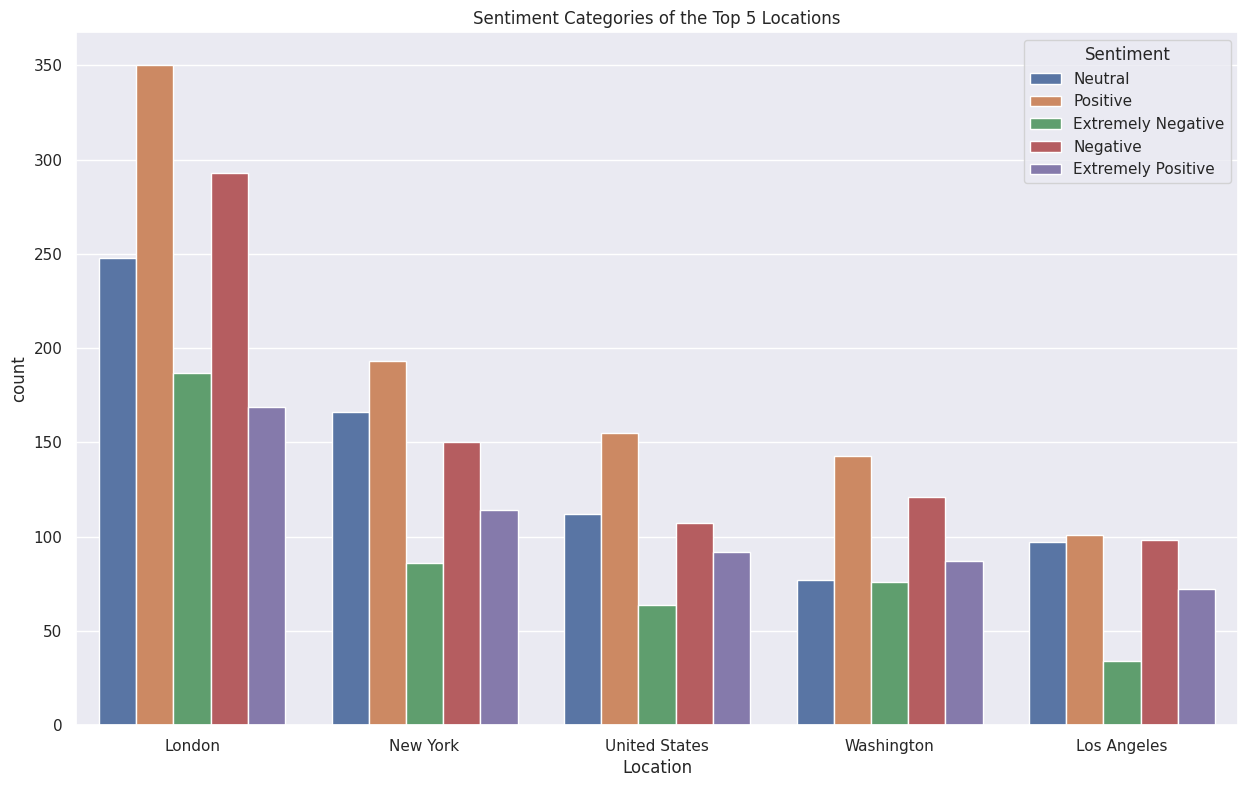

In [ ]:
# Visualizing Sentiment Distribution in Top 5 Locations

sns.set(rc={'figure.figsize':(15,9)})
gg = train.Location.value_counts()[:5].index
plt.title('Sentiment Categories of the Top 5 Locations')
sns.countplot(x = 'Location', hue = 'Sentiment', data = plotDf, order = gg)

Dropping Screen Name and Username from the dataset

In [ ]:
train = train.drop('ScreenName', axis=1)
train = train.drop('UserName', axis=1)
train

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...
41152,Wellington City,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### 1.3.4 Top mentions and hashtags in the tweets

<ipython-input-86-c55d3635501c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashTags.index, y=top_hashTags.values, palette="viridis")


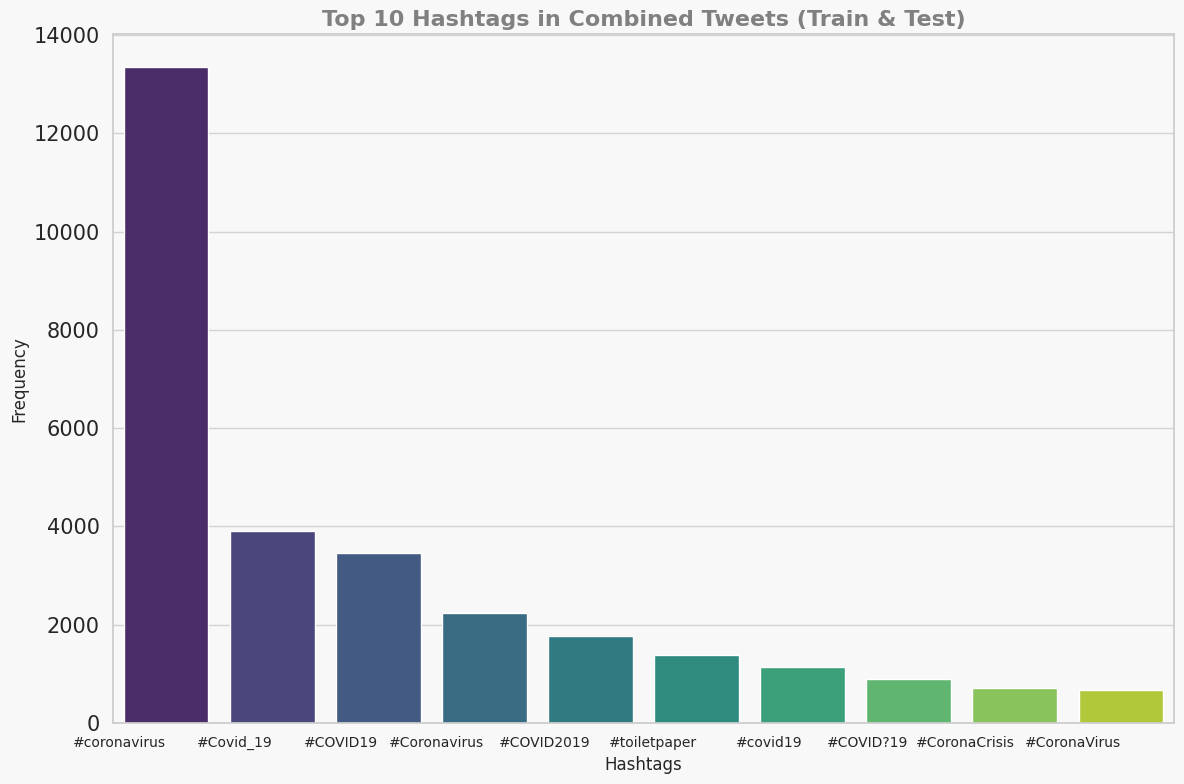

In [ ]:
# Extracting and Visualizing Top Hashtags in Tweets

import unicodedata

datasets = [train, test]

# Normalize hashtags for both datasets
for dataset in datasets:
    dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(
        lambda x: unicodedata.normalize('NFKD', x) if isinstance(x, str) else x
    )

all_tweets = pd.concat([train['OriginalTweet'], test['OriginalTweet']])

# Extract hashtags
hashTags = all_tweets.str.extractall(r"(#\S+)")
hashTags = hashTags[0].value_counts()

top_hashTags = hashTags[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_hashTags.index, y=top_hashTags.values, palette="viridis")
plt.xticks( ha='right', fontsize=10)
plt.xlabel("Hashtags", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Top 10 Hashtags in Combined Tweets (Train & Test)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Convert top hashtags to a DataFrame
top_hashTags_df = top_hashTags.reset_index()
top_hashTags_df.columns = ['Hashtag', 'Frequency']

top_hashTags_df.style.set_caption("Top 10 Hashtags in Tweets") \
                    .background_gradient(cmap="viridis", subset=["Frequency"]) \
                    .set_properties(**{'text-align': 'left', 'font-size': '12px'})

,Hashtag,Frequency
0,#coronavirus,13345
1,#Covid_19,3900
2,#COVID19,3470
3,#Coronavirus,2236
4,#COVID2019,1772
5,#toiletpaper,1376
6,#covid19,1133
7,#COVID?19,893
8,#CoronaCrisis,720
9,#CoronaVirus,669


## 1.4 Test dataset exploration

In [ ]:
# Checking null values in the Test dataset
test.isnull().sum()

,0
UserName,0
ScreenName,0
Location,834
TweetAt,0
OriginalTweet,0
Sentiment,0


In [ ]:
# Removing lines with missing values
test.dropna(inplace=True)

In [ ]:
# Checking after removing

test.isnull().sum()

,0
UserName,0
ScreenName,0
Location,0
TweetAt,0
OriginalTweet,0
Sentiment,0


## 1.5 Word cloud of Train and test dataset Tweets

In [ ]:
# Setting Visualization Styles and Parameters (using seaborn)

plt.rcParams['figure.figsize'] = [15, 7]

my_colors = ["#05A4C0", "#85CEDA", "#D2A7D8", "#A67BC5", "#BB1C8B", "#8D266E"]

sns.set_theme(style="whitegrid", rc={
    'axes.facecolor': '#f8f8f8',
    'figure.facecolor': '#f8f8f8',
    'grid.color': 'lightgray',
    'text.color': 'grey',
    'axes.titlesize': 22,
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
})

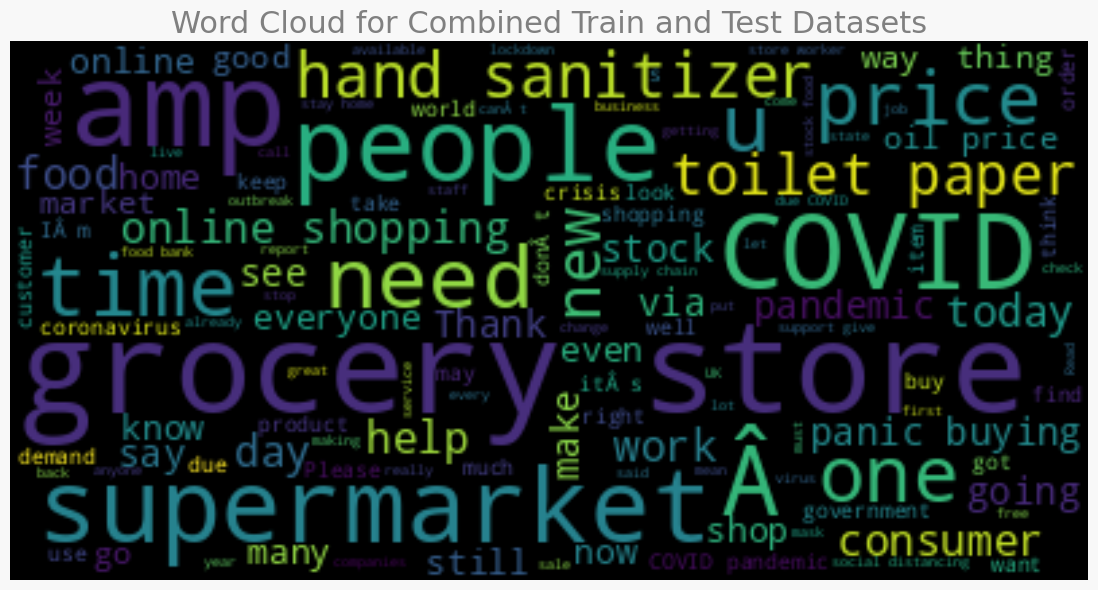

In [ ]:
# Generating a Word Cloud for Train and Test Datasets

from wordcloud import WordCloud
import matplotlib.pyplot as plt

combined_text = ' '.join(train['OriginalTweet']) + ' ' + ' '.join(test['OriginalTweet'])

wordcloud = WordCloud(max_words=150, colormap='viridis').generate(combined_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Combined Train and Test Datasets")
plt.show()

# 2.Data processing

## 2.1 Clean the tweets by removing hashtags, mentions, urls, digits and stop words.

In [ ]:
# Defining a Function to Clean Text Data

import re

def clean(text):
    text = re.sub(r'http\S+', " ", text)  # remove urls
    text = re.sub(r'@\w+',' ',text)       # remove mentions
    text = re.sub(r'#\w+', ' ', text)     # remove hashtags
    text = re.sub(r'\d+', ' ', text)      # remove digits
    text = re.sub('r<.*?>',' ', text)     # remove html tags
    text = text.split()                   #removing stop words
    text = " ".join([word for word in text if not word in stopWord])

    return text

## 2.2 Setup NLTK and Download Stopwords

In [ ]:
# Setting Up NLTK and Downloading Stopwords

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2.3 Map Sentiment Categories to Numerical Values

In [ ]:
# Mapping Sentiment Labels to Numeric Values

def update(category):
    if category == "Neutral":
        return 0
    elif category == "Positive":
        return 1
    elif category == "Extremely Positive":
        return 2
    elif category == "Extremely Negative":
        return -2
    elif category == "Negative":
        return -1
    return category


train["Sentiment"] = train["Sentiment"].apply(update)
train.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",-2


In [ ]:
# Cleaning Tweets in the Training Dataset
stopWord = stopwords.words('english')
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: clean(x))

In [ ]:
# Selecting Relevant Columns for Training
train = train[['OriginalTweet','Sentiment']]
train.head()

,OriginalTweet,Sentiment
0,,0
1,advice Talk neighbours family exchange phone n...,1
2,Coronavirus Australia: Woolworths give elderly...,1
3,"My food stock one empty... PLEASE, panic, THER...",1
4,"Me, ready go supermarket outbreak. Not I'm par...",-2


In [ ]:
test["Sentiment"] = test["Sentiment"].apply(update)

test.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,-2
1,2,44954,Seattle,02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,-1
4,5,44957,Melbourne,03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,0
7,8,44960,Geneva,03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without pro...",0
9,10,44962,Dublin,04-03-2020,Anyone been in a supermarket over the last few...,2
10,11,44963,Boksburg,04-03-2020,Best quality couches at unbelievably low price...,1
11,12,44964,New Delhi,04-03-2020,Beware of counterfeits trying to sell fake mas...,-2
12,13,44965,USA,04-03-2020,Panic food buying in Germany due to #coronavir...,-2


In [ ]:
stopWord = stopwords.words('english')
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: clean(x))
test = test[['OriginalTweet','Sentiment']]

**Corpus Function**

This predefined function is going to clean the text:
remove punctuation, strip whitespace, transforms to lower case, remove stopwords (common words that should be ignored), and remove numbers

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
train['Corpus'] = [nltk.word_tokenize(text) for text in train.OriginalTweet]
test['Corpus'] = [nltk.word_tokenize(text) for text in test.OriginalTweet]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-35-3af4034e97d8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Corpus'] = [nltk.word_tokenize(text) for text in train.OriginalTweet]


In [ ]:
train.head()

,OriginalTweet,Sentiment,Corpus
0,,0,[]
1,advice Talk neighbours family exchange phone n...,1,"[advice, Talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths give elderly...,1,"[Coronavirus, Australia, :, Woolworths, give, ..."
3,"My food stock one empty... PLEASE, panic, THER...",1,"[My, food, stock, one, empty, ..., PLEASE, ,, ..."
4,"Me, ready go supermarket outbreak. Not I'm par...",-2,"[Me, ,, ready, go, supermarket, outbreak, ., N..."


In [ ]:
test.head(10)

,OriginalTweet,Sentiment,Corpus
0,TRENDING: New Yorkers encounter empty supermar...,-2,"[TRENDING, :, New, Yorkers, encounter, empty, ..."
1,"When I find hand sanitizer Fred Meyer, I turne...",1,"[When, I, find, hand, sanitizer, Fred, Meyer, ..."
3,buying hits City anxious shoppers stock food&a...,-1,"[buying, hits, City, anxious, shoppers, stock,..."
4,One week everyone buying baby milk powder next...,0,"[One, week, everyone, buying, baby, milk, powd..."
5,Do remember last time paid $ . gallon regular ...,0,"[Do, remember, last, time, paid, $, ., gallon,..."
7,"""We canÂt stop without protecting . Prices su...",0,"[``, We, canÂt, stop, without, protecting, .,..."
9,Anyone supermarket last days? Went NORMAL shop...,2,"[Anyone, supermarket, last, days, ?, Went, NOR..."
10,Best quality couches unbelievably low prices a...,1,"[Best, quality, couches, unbelievably, low, pr..."
11,Beware counterfeits trying sell fake masks che...,-2,"[Beware, counterfeits, trying, sell, fake, mas..."
12,Panic food buying Germany due begun. But left ...,-2,"[Panic, food, buying, Germany, due, begun, ., ..."


**Splitting Dataset into Features and Labels for Training and Testing**

*   Input data: OriginalTweet
*   Target labels: Sentiment

In [ ]:
XTrain = train['OriginalTweet']
yTrain = train['Sentiment']
XTest = test['OriginalTweet']
yTest = test['Sentiment']

# 3.Build and Train Logistic Regression Pipeline

In [ ]:
# Building and Training a Logistic Regression Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

clf_logReg_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_logReg", LogisticRegression(max_iter=1000))])

clf_logReg_pipe.fit(XTrain, yTrain)



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_logReg', LogisticRegression(max_iter=1000))])

In [ ]:
# Evaluating Logistic Regression Model Accuracy

predictedLogReg = clf_logReg_pipe.predict(XTest)
np.mean(predictedLogReg == yTest)

0.5742240215924427

In [ ]:
print(classification_report(yTest, clf_logReg_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.66      0.48      0.56       449
          -1       0.53      0.53      0.53       811
           0       0.66      0.72      0.69       497
           1       0.48      0.62      0.54       725
           2       0.71      0.51      0.59       482

    accuracy                           0.57      2964
   macro avg       0.61      0.57      0.58      2964
weighted avg       0.59      0.57      0.57      2964



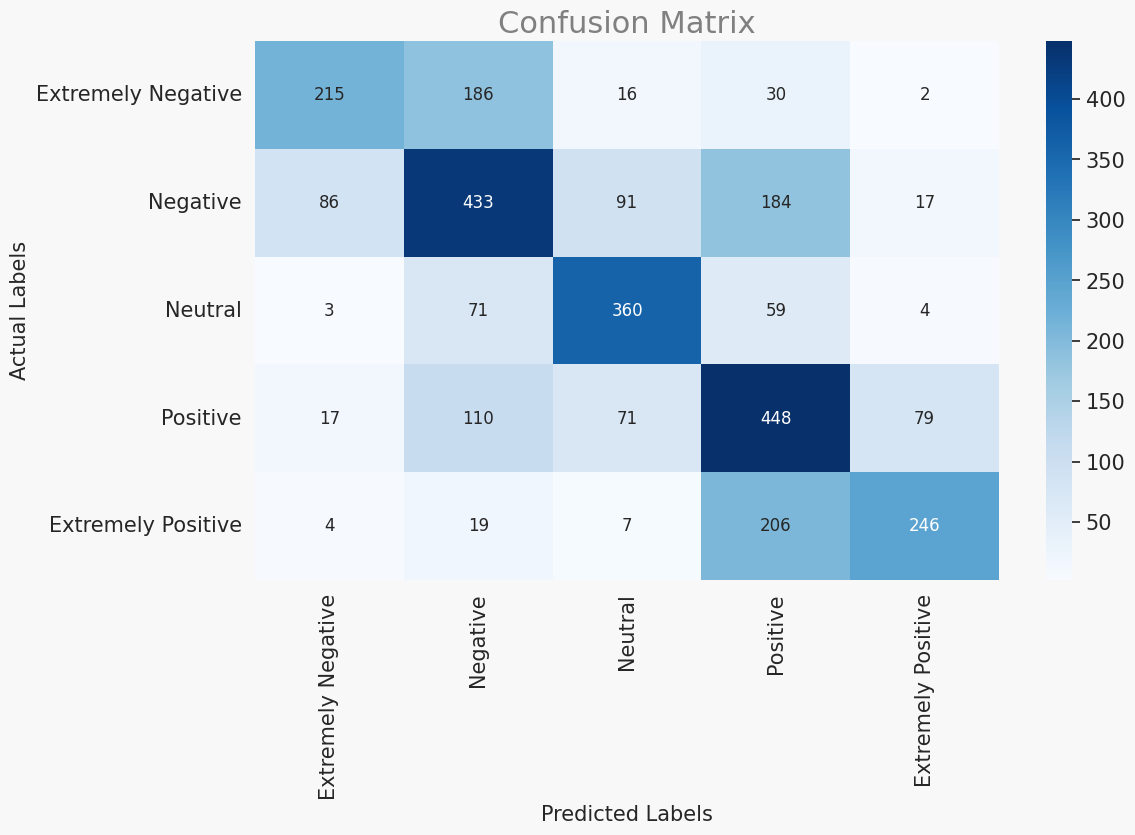

In [ ]:
# Generating and Visualizing Confusion Matrix for Logistic Regression

from sklearn.metrics import confusion_matrix

# Mapping between numeric labels and sentiment names
label_mapping = {
    0: "Neutral",
    1: "Positive",
    2: "Extremely Positive",
    -1: "Negative",
    -2: "Extremely Negative"
}

yPred = clf_logReg_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


Prediction on evaluation dataset

In [ ]:
# Load tweet dataset to a new frame
tweet_lg = pd.read_csv('covid19_tweets.csv')

tweet_lg['text'] = tweet_lg['text'].fillna('')

# Predict sentiment using the 'text' column of the tweet Dataset
tweet_lg['predicted_sentiment'] = clf_logReg_pipe.predict(tweet_lg['text'])

In [ ]:
print(tweet_lg[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                    1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    1
3       @brookbanktv The one gift #COVID19 has give me...                    0
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                    1
179105  @CTVNews A powerful painting by Juan Lucena. I...                   -1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -2

[179108 rows x 2 columns]


# 4.Build and Train Multinomial Naive Bayes Pipeline

In [ ]:
# Assigning Training and Test Sets
XTrain = train['OriginalTweet']
yTrain = train['Sentiment']
XTest = test['OriginalTweet']
yTest = test['Sentiment']

In [ ]:
# Building and Training a Naive Bayes Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(XTrain, yTrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [ ]:
# predict accuracy
predictedMultiNB = clf_multiNB_pipe.predict(XTest)
np.mean(predictedMultiNB == yTest)

0.3586369770580297

In [ ]:
print(classification_report(yTest, clf_multiNB_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.80      0.02      0.03       449
          -1       0.40      0.43      0.42       811
           0       0.82      0.09      0.17       497
           1       0.32      0.88      0.47       725
           2       0.95      0.04      0.07       482

    accuracy                           0.36      2964
   macro avg       0.66      0.29      0.23      2964
weighted avg       0.60      0.36      0.27      2964



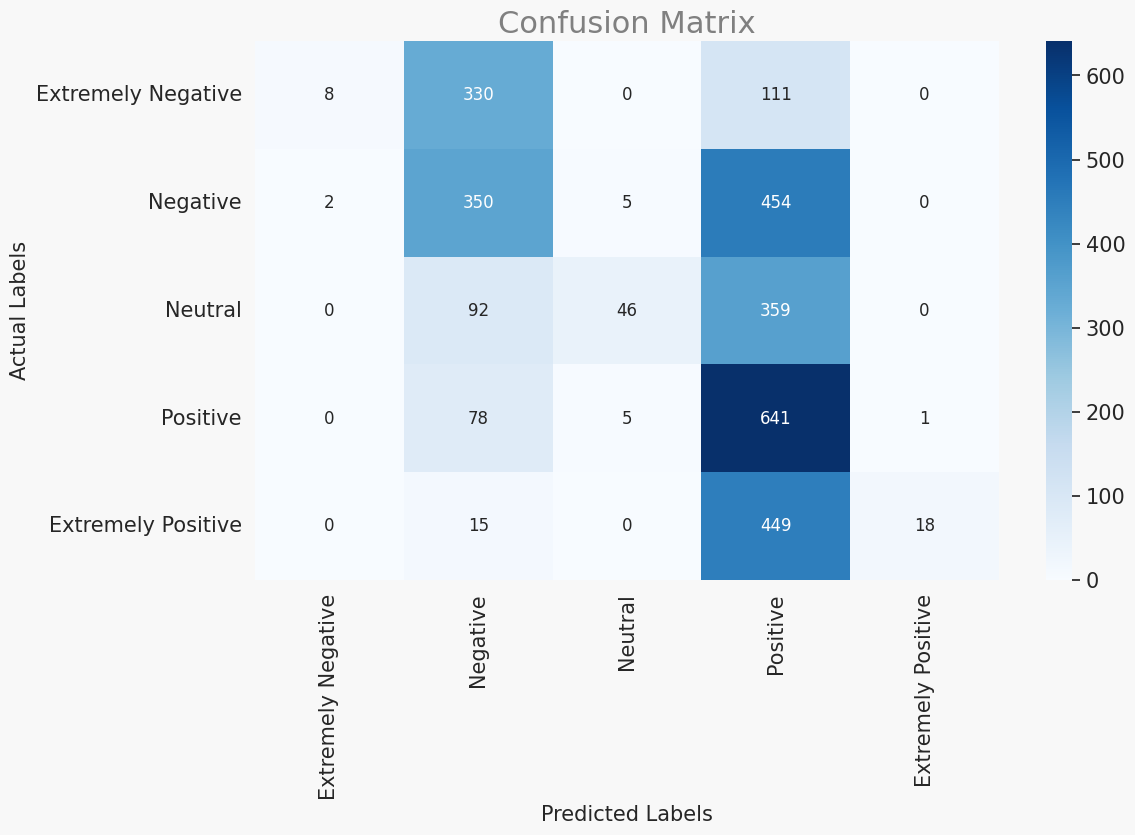

In [ ]:
# Evaluating Naive Bayes Model with Confusion Matrix
yPred = clf_multiNB_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())  # Numeric labels in sorted order
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Prediction on evaluation dataset



In [ ]:
# Load tweet dataset to a new frame
nv_new_data = pd.read_csv('covid19_tweets.csv')

# Predict sentiment using the 'text' column of the new DataFrame
nv_new_data['predicted_sentiment'] = clf_multiNB_pipe.predict(nv_new_data['text'])

print(nv_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                    1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    1
3       @brookbanktv The one gift #COVID19 has give me...                    1
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                    1
179105  @CTVNews A powerful painting by Juan Lucena. I...                    1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                    1

[179108 rows x 2 columns]


# 5.Build and Train Linear SVC Pipeline

In [ ]:
# Building and Training a Linear SVC Pipeline
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(XTrain, yTrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_linearSVC', LinearSVC())])

In [ ]:
# predict accuracy
predictedLinearSVC = clf_linearSVC_pipe.predict(XTest)
np.mean(predictedLinearSVC == yTest)

0.5674763832658569

In [ ]:
print(classification_report(yTest, clf_linearSVC_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.59      0.58      0.59       449
          -1       0.52      0.46      0.49       811
           0       0.64      0.71      0.67       497
           1       0.49      0.53      0.51       725
           2       0.68      0.64      0.66       482

    accuracy                           0.57      2964
   macro avg       0.58      0.58      0.58      2964
weighted avg       0.57      0.57      0.57      2964



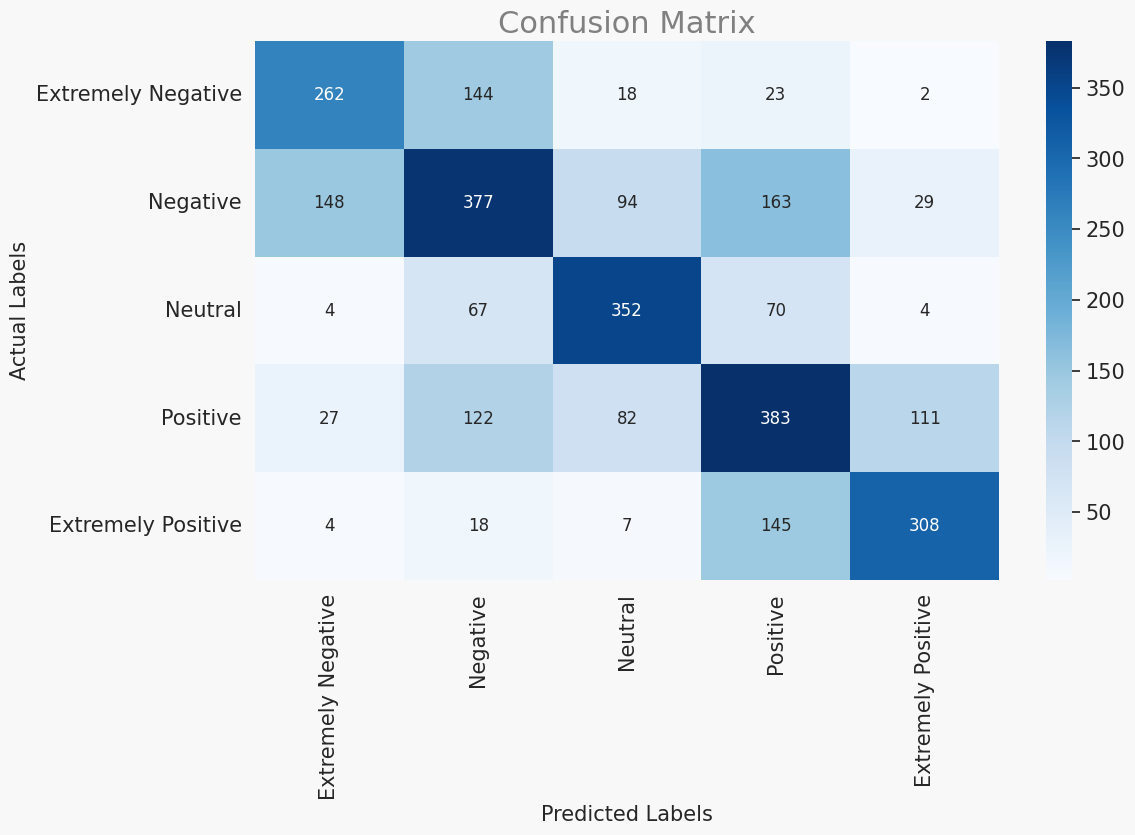

In [ ]:
# Generating and Visualizing the Confusion Matrix
yPred = clf_linearSVC_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Prediction on evaluation dataset

In [ ]:
# Load tweet dataset to a new frame
svm_new_data = pd.read_csv('covid19_tweets.csv')

# Predict sentiment using the 'text' column (raw text) of the new DataFrame
svm_new_data['predicted_sentiment'] = clf_linearSVC_pipe.predict(svm_new_data['text'])

print(svm_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                   -1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    0
3       @brookbanktv The one gift #COVID19 has give me...                    2
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                   -2
179105  @CTVNews A powerful painting by Juan Lucena. I...                    1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -2

[179108 rows x 2 columns]


# 6.Fine Tune Linear SVC Pipeline

In [ ]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
             'tfidf__use_idf': (True, False),
             }
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(XTrain,
                                                  yTrain)

In [ ]:
# predict accuracy
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(XTest)
np.mean(predictedGS_clf_LinearSVC_pipe == yTest)

0.5748987854251012

In [ ]:
print(classification_report(yTest, gs_clf_LinearSVC_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.59      0.60      0.60       449
          -1       0.53      0.47      0.50       811
           0       0.66      0.76      0.71       497
           1       0.49      0.51      0.50       725
           2       0.65      0.64      0.65       482

    accuracy                           0.57      2964
   macro avg       0.59      0.60      0.59      2964
weighted avg       0.57      0.57      0.57      2964



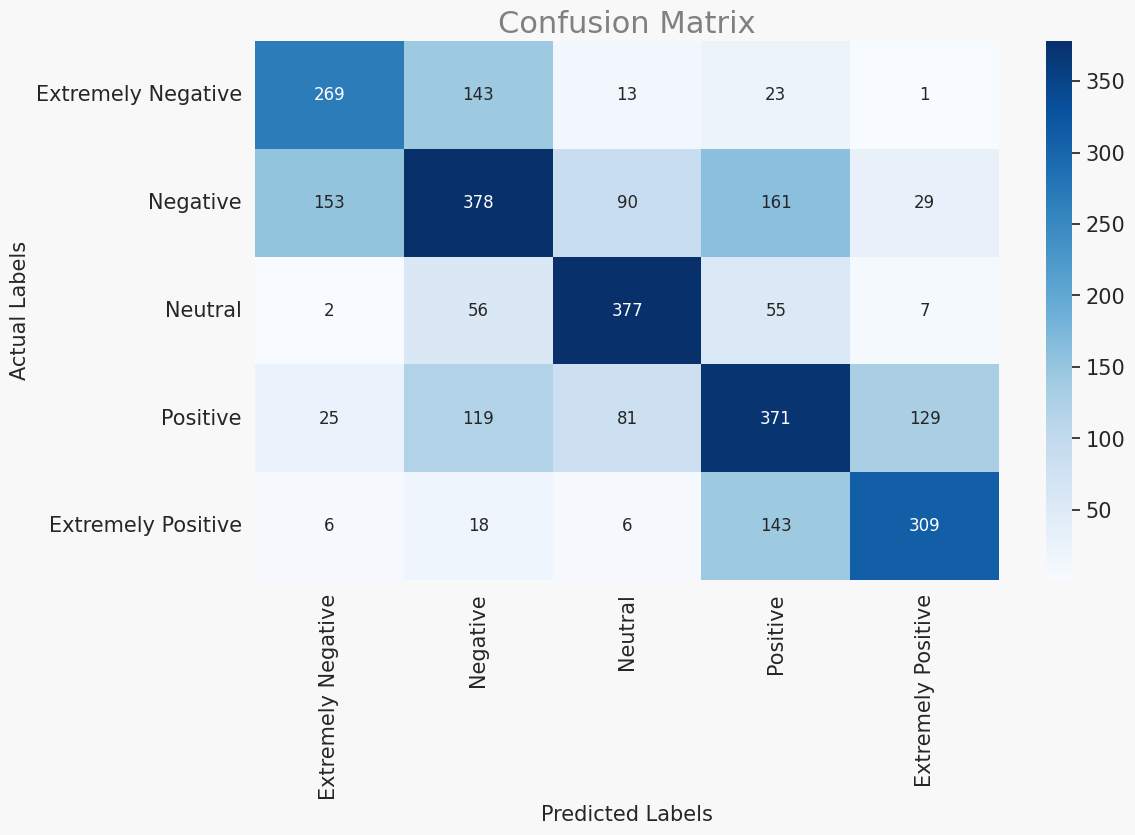

In [ ]:
# Model Evaluation with Confusion Matrix
yPred = gs_clf_LinearSVC_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Prediction on evaluation dataset

In [ ]:
# Load tweet dataset to a new frame
fine_tune_svm_new_data = pd.read_csv('covid19_tweets.csv')

# Predict sentiment using the 'text' column of the new DataFrame
fine_tune_svm_new_data['predicted_sentiment'] = gs_clf_LinearSVC_pipe.predict(fine_tune_svm_new_data['text'])

print(fine_tune_svm_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                    1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    0
3       @brookbanktv The one gift #COVID19 has give me...                    2
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                   -2
179105  @CTVNews A powerful painting by Juan Lucena. I...                    1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -2

[179108 rows x 2 columns]


#7.Random Forest Pipeline



In [ ]:
# Random Forest Classifier Pipeline Setup and Training
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("rf_clf", RandomForestClassifier())])
rf_clf.fit(XTrain, yTrain)



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('rf_clf', RandomForestClassifier())])

In [ ]:
# predict accuracy
predictedrf_clf = rf_clf.predict(XTest)
np.mean(predictedrf_clf == yTest)

0.5192307692307693

In [ ]:
print(classification_report(yTest, rf_clf.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.66      0.40      0.50       449
          -1       0.48      0.48      0.48       811
           0       0.58      0.71      0.64       497
           1       0.43      0.60      0.50       725
           2       0.71      0.37      0.49       482

    accuracy                           0.52      2964
   macro avg       0.57      0.51      0.52      2964
weighted avg       0.55      0.52      0.52      2964



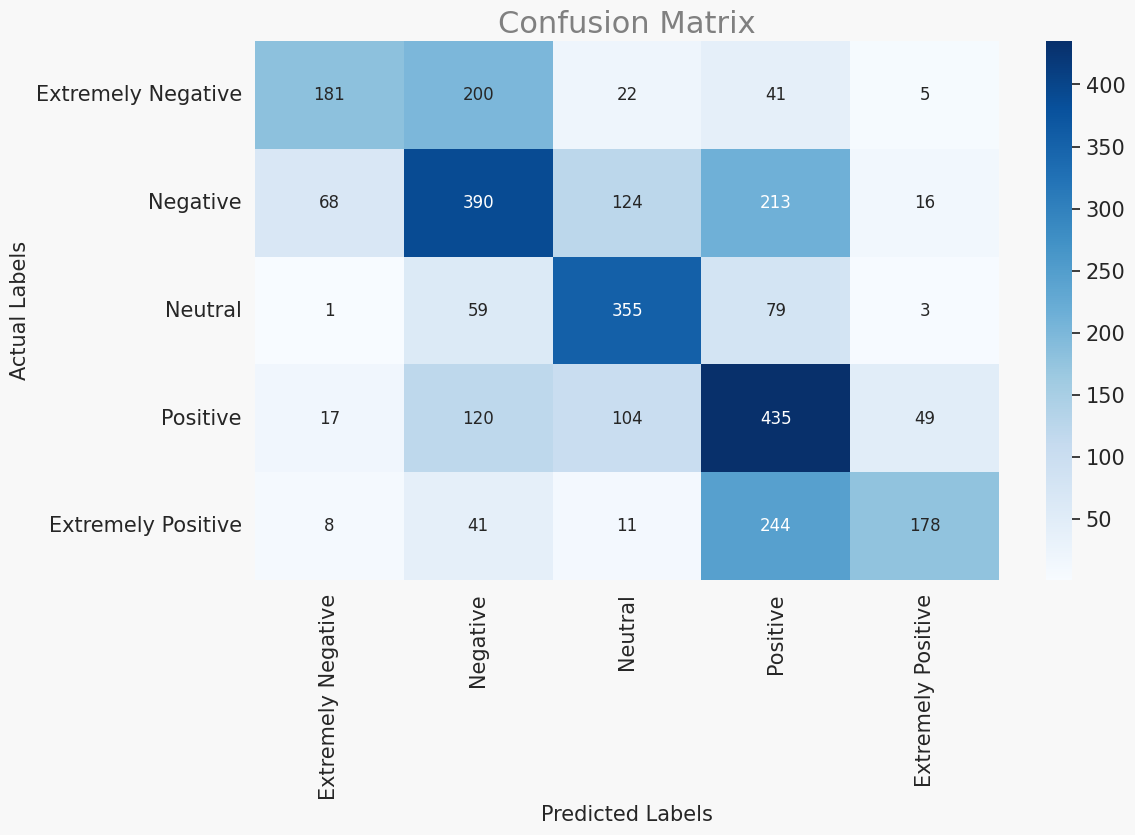

In [ ]:
# Model Evaluation for Random Forest Classifier
yPred = rf_clf.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [ ]:
# Load tweet dataset to a new frame
rf_new_data = pd.read_csv('covid19_tweets.csv', low_memory=False)

# Handling possible missing values in the 'text' column
rf_new_data['text'] = rf_new_data['text'].fillna('').astype(str)

# Predict sentiment using the 'text' column of the new DataFrame
rf_new_data['predicted_sentiment'] = rf_clf.predict(rf_new_data['text'])

print(rf_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                   -1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    1
3       @brookbanktv The one gift #COVID19 has give me...                    0
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                    1
179105  @CTVNews A powerful painting by Juan Lucena. I...                   -1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -1

[179108 rows x 2 columns]


# 8.RNN Model for Text Classification: Preprocessing, Training, and Evaluation

XTrain_pad shape: (41157, 54)
XTest_pad shape: (2964, 54)
Number of classes: 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (1, 54, 16)                 │         574,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (1, 54, 512)                │         559,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (1, 512)                    │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 64)                     │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 64)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 5)                      │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,166,661 (4.45 MB)

 Trainable params: 1,166,661 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 438s 337ms/step - accuracy: 0.3863 - loss: 1.3869 - val_accuracy: 0.7200 - val_loss: 0.7610
Epoch 2/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 439s 335ms/step - accuracy: 0.7755 - loss: 0.6478 - val_accuracy: 0.7554 - val_loss: 0.6702
Epoch 3/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 429s 334ms/step - accuracy: 0.8485 - loss: 0.4689 - val_accuracy: 0.7456 - val_loss: 0.7097
Epoch 4/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 444s 336ms/step - accuracy: 0.8849 - loss: 0.3666 - val_accuracy: 0.7510 - val_loss: 0.7341
Epoch 5/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 447s 339ms/step - accuracy: 0.9049 - loss: 0.3081 - val_accuracy: 0.7513 - val_loss: 0.7854
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.7444 - loss: 0.8021
Test Accuracy: 0.7513


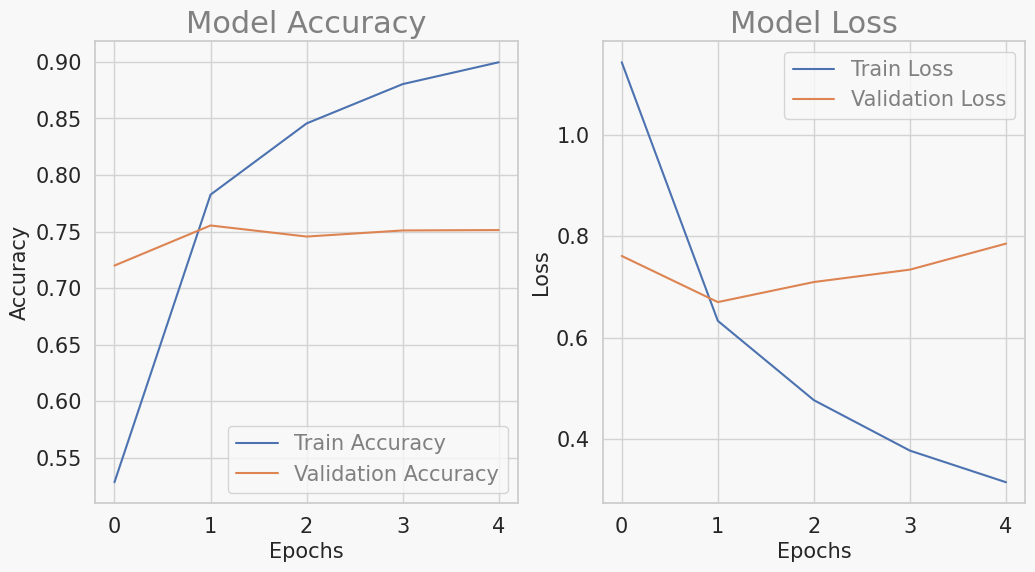

In [ ]:
# Importing Libraries for Text Preprocessing and RNN Model Development
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(XTrain)
vocab_size = len(tokenizer.word_index) + 1  # Total number of words in vocabulary

# Convert text to sequences
XTrain_seq = tokenizer.texts_to_sequences(XTrain)
XTest_seq = tokenizer.texts_to_sequences(XTest)

# Pad the sequences
max_len = max(len(x) for x in XTrain_seq)  # Maximum sequence length
XTrain_pad = pad_sequences(XTrain_seq, maxlen=max_len, padding='post')
XTest_pad = pad_sequences(XTest_seq, maxlen=max_len, padding='post')

print(f"XTrain_pad shape: {XTrain_pad.shape}")
print(f"XTest_pad shape: {XTest_pad.shape}")

# Encode the labels
label_encoder = LabelEncoder()
yTrain_enc = label_encoder.fit_transform(yTrain)
yTest_enc = label_encoder.transform(yTest)

print(f"Number of classes: {len(label_encoder.classes_)}")

# Clear previous TensorFlow sessions
tf.keras.backend.clear_session()

# Hyperparameters
EPOCHS = 5
BATCH_SIZE = 32
embedding_dim = 16
units = 256

# Define the RNN model
model = tf.keras.Sequential([
    L.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=XTrain_pad.shape[1]),
    L.Bidirectional(L.LSTM(units, return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(len(label_encoder.classes_))  # Number of output classes
])

# Compile the model
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

# Call the model with a dummy input to build the layers
dummy_input = tf.random.uniform((1, XTrain_pad.shape[1]))  # A single sample with max_len tokens
model(dummy_input)

model.summary()

# Train the model
history = model.fit(
    XTrain_pad,
    yTrain_enc,
    validation_data=(XTest_pad, yTest_enc),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(XTest_pad, yTest_enc)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Predict sentiments for a new dataset and save to CSV
# Load the dataset to a new frame
new_data_rnn = pd.read_csv('covid19_tweets.csv')

# Handle missing values in the 'text' column (replace NaN with empty strings)
new_data_rnn['text'] = new_data_rnn['text'].fillna('').astype(str)

# Tokenize the text data from the new dataset
new_data_rnn_seq = tokenizer.texts_to_sequences(new_data_rnn['text'])

# Pad the sequences to match the training data's maximum length
new_data_rnn_pad = pad_sequences(new_data_rnn_seq, maxlen=max_len, padding='post')

# Predict sentiments for the new dataset
new_data_rnn_predictions = tf.argmax(model.predict(new_data_rnn_pad), axis=1).numpy()

# Decode predictions back to their original labels
new_data_rnn['predicted_sentiment'] = label_encoder.inverse_transform(new_data_rnn_predictions)

# Save the results to a CSV file
new_data_rnn.to_csv('covid19_tweets_with_predicted_output.csv', index=False)

print("Predicted sentiments saved to 'covid19_tweets_with_predicted_output.csv'.")

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 513s 92ms/step
Predicted sentiments saved to 'covid19_tweets_with_predicted_output.csv'.


# 9.Evaluation

## 9.1 Predicted Sentiment count on Evaluation dataset (on Data generated by RNN)

In [ ]:
# Load the COVID-19 tweets dataset
file_path = "covid19_tweets_with_predicted_output.csv"
tweets_df = pd.read_csv(file_path)

print(tweets_df[['text', 'predicted_sentiment']].head())

                                                text  predicted_sentiment
0  If I smelled the scent of hand sanitizers toda...                  1.0
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...                 -1.0
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...                 -1.0
3  @brookbanktv The one gift #COVID19 has give me...                  2.0
4  25 July : Media Bulletin on Novel #CoronaVirus...                  1.0


<ipython-input-71-234b080b06a0>:3: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv(file_path)


<ipython-input-72-b0f19b57e170>:2: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv(file_path)
<ipython-input-72-b0f19b57e170>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_counts, x="frequency", y="sentiment", palette="coolwarm", orient="h")


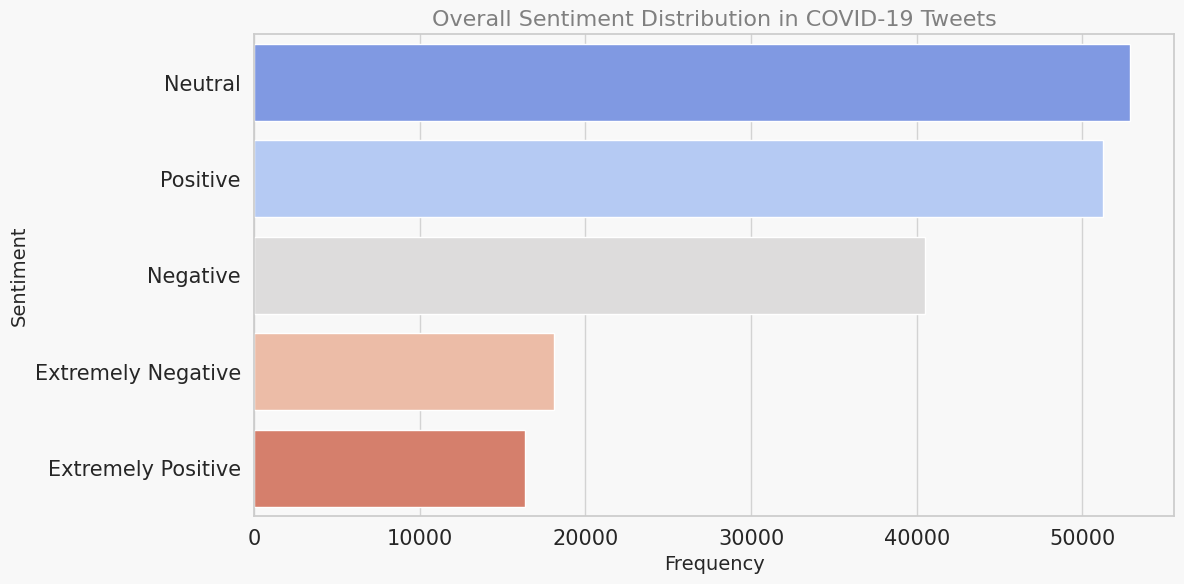

In [ ]:
# Visualizing Sentiment Distribution in COVID-19 Tweets
file_path = "covid19_tweets_with_predicted_output.csv"
tweets_df = pd.read_csv(file_path)

tweet_column = "text"
sentiment_column = "predicted_sentiment"

# Mapping between numeric sentiment values and sentiment labels
sentiment_mapping = {
    0: "Neutral",
    1: "Positive",
    2: "Extremely Positive",
    -1: "Negative",
    -2: "Extremely Negative"
}

tweets_df[sentiment_column] = tweets_df[sentiment_column].map(sentiment_mapping)

# Frequencies of each sentiment
sentiment_counts = tweets_df[sentiment_column].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'frequency']

plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x="frequency", y="sentiment", palette="coolwarm", orient="h")
plt.title("Overall Sentiment Distribution in COVID-19 Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.tight_layout()
plt.show()

## 9.2 Models comparison

In [ ]:
# Evaluating and Comparing Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name, is_rnn=False):
    """Evaluates a model and returns a dictionary of metrics."""
    if is_rnn:
        y_pred = tf.argmax(model.predict(X_test), axis=1).numpy()
        y_pred_labels = label_encoder.inverse_transform(y_pred)
    else:
        y_pred = model.predict(X_test)
        y_pred_labels = y_pred

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred_labels),
        "Precision": precision_score(y_test, y_pred_labels, average='weighted'),
        "Recall": recall_score(y_test, y_pred_labels, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_labels, average='weighted')
    }

models = [
    (clf_logReg_pipe, "Logistic Regression", False),
    (clf_linearSVC_pipe, "SVM", False),
    (gs_clf_LinearSVC_pipe, "Fine-Tuned SVM", False),
    (clf_multiNB_pipe, "Naive Bayes", False),
    (rf_clf, "Random Forest", False),
    (model, "RNN", True)
]

results = [evaluate_model(model, XTest_pad if is_rnn else XTest, yTest, name, is_rnn) for model, name, is_rnn in models]

print(pd.DataFrame(results))

93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.574224   0.588798  0.574224  0.574451
1                  SVM  0.567476   0.567431  0.567476  0.566454
2       Fine-Tuned SVM  0.574899   0.572207  0.574899  0.572432
3          Naive Bayes  0.358637   0.601545  0.358637  0.273628
4        Random Forest  0.519231   0.548542  0.519231  0.515859
5                  RNN  0.751350   0.758823  0.751350  0.753295
